# bounds

In [4]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [13]:
with open("b_test2.pkl", "rb") as f:
    output = pickle.load(f)

N_Z0 = len(output)
N_ACTIONS = len(output[0]["results"])
N_SAMPLES = output[0]["results"][0]["X"].shape[0]

print(N_Z0, N_ACTIONS, N_SAMPLES)
print(output[0].keys())

20 10 30
dict_keys(['results', 'distances', 'z0', 'z0_embedding'])


# single

In [ ]:
zoi = 0

all_X = [result["X"] for result in output[zoi]["results"]]
all_X.append([result["u_embedding"] for result in output[zoi]["results"]])
all_X.append(output[zoi]["z0_embedding"])
all_X = np.vstack(all_X)

print(all_X.shape)

(311, 384)


In [6]:
# xpca = PCA(n_components=300).fit_transform(all_X)
x2d = TSNE(n_components=2, perplexity=10).fit_transform(all_X)

/local/scr/stmorse/TMPDIR/ipykernel_1484029/85596950.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x2d[a:b,0], x2d[a:b,1], s=30, c=colors[i], alpha=0.6)
/local/scr/stmorse/TMPDIR/ipykernel_1484029/85596950.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x2d[TOTAL + i, 0], x2d[TOTAL + i, 1], s=50, c=colors[i], marker='+', alpha=0.6)


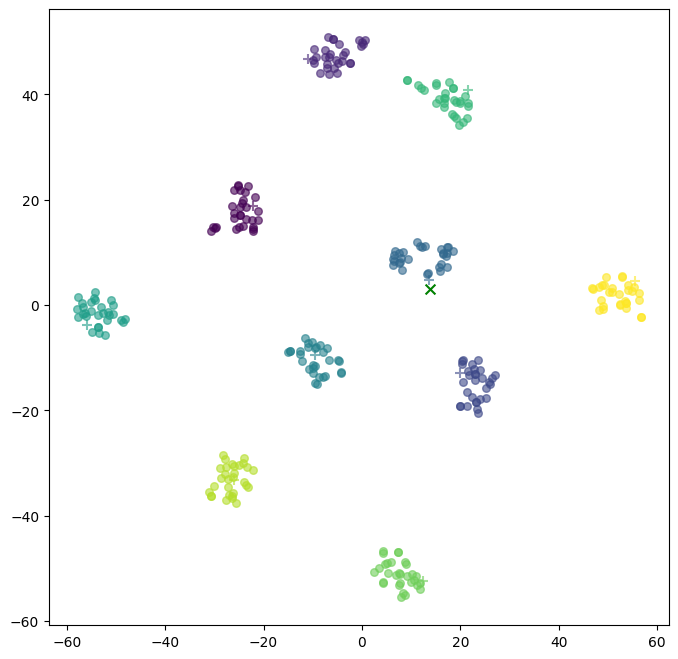

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

TOTAL = N_ACTIONS * N_SAMPLES

colors = plt.cm.viridis(np.linspace(0, 1, N_ACTIONS))

# plot z0
ax.scatter(x2d[-1,0], x2d[-1,1], s=50, c='g', marker='x')

for i in range(N_ACTIONS):
    a, b = i*N_SAMPLES, (i+1)*N_SAMPLES
    ax.scatter(x2d[a:b,0], x2d[a:b,1], s=30, c=colors[i], alpha=0.6)

    # plot the z0+u
    ax.scatter(x2d[TOTAL + i, 0], x2d[TOTAL + i, 1], s=50, c=colors[i], marker='+', alpha=0.6)

plt.show()

In [12]:
output[1]["z0"]

'How do you like to spend a rainy day?'

# all

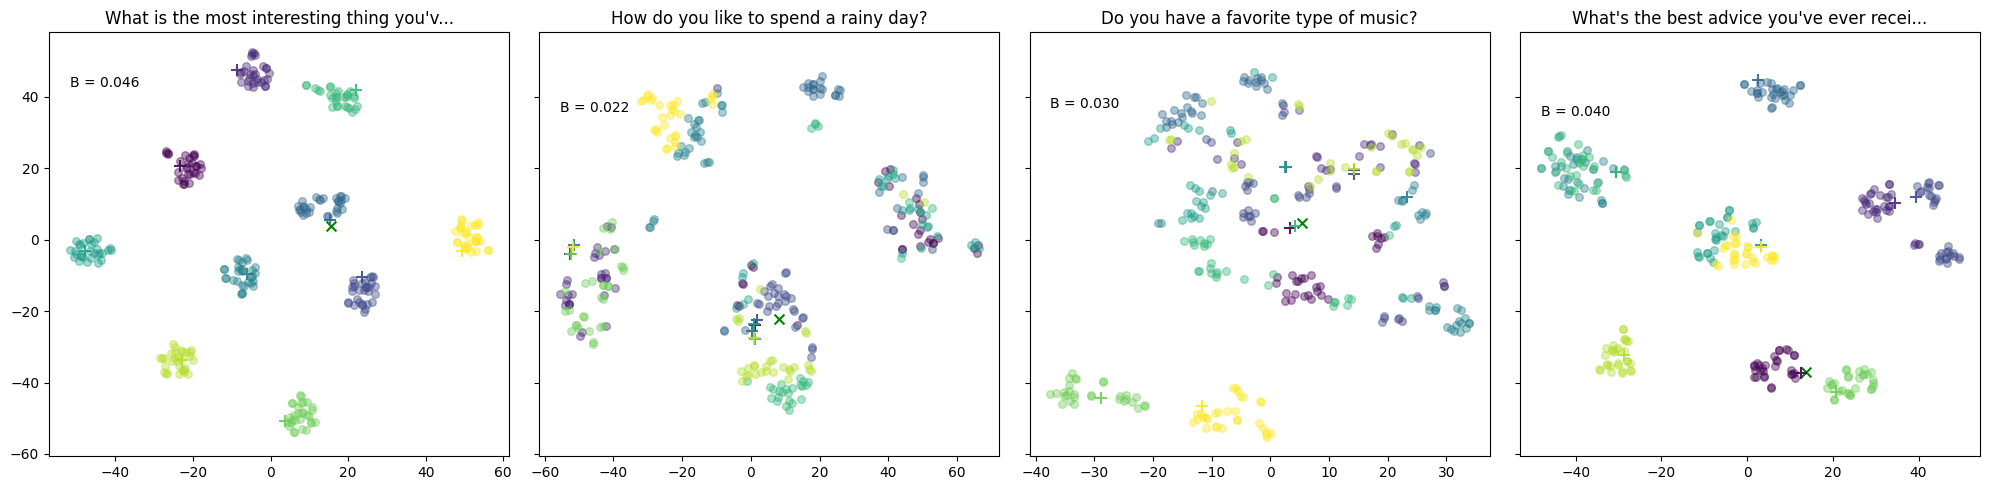

In [23]:
zois = [0, 1, 2, 3]

fig, axs = plt.subplots(1,len(zois), figsize=(5*len(zois),5), sharey=True)

TOTAL = N_ACTIONS * N_SAMPLES

colors = plt.cm.viridis(np.linspace(0, 1, N_ACTIONS))

for ax, zoi in zip(axs.ravel(), zois):
    # create matrix of embeddings
    all_X = [result["X"] for result in output[zoi]["results"]]
    all_X.append([result["u_embedding"] for result in output[zoi]["results"]])
    all_X.append(output[zoi]["z0_embedding"])
    all_X = np.vstack(all_X)

    # project
    x2d = TSNE(n_components=2, perplexity=10).fit_transform(all_X)

    # plot z0
    ax.scatter(x2d[-1,0], x2d[-1,1], s=50, c='g', marker='x')

    for i in range(N_ACTIONS):
        a, b = i*N_SAMPLES, (i+1)*N_SAMPLES
        ax.scatter(x2d[a:b,0], x2d[a:b,1], s=30, color=colors[i], alpha=0.4)

        # plot the z0+u
        ax.scatter(x2d[TOTAL + i, 0], x2d[TOTAL + i, 1], s=70, color=colors[i], marker='+', alpha=0.9)

    max_b = np.amax(output[zoi]["distances"])
    ax.text(np.amin(x2d[:,0]), np.amax(x2d[:,1]) - 10, f"B = {max_b:.3f}")
    
    title = output[zoi]["z0"]
    title_r = title[:40] + ("..." if len(title) > 40 else "")
    ax.set_title(title_r)

plt.tight_layout()
plt.show()

In [18]:
z = "this is a very long string that will be truncated"
print(f"{z:<5}")

this is a very long string that will be truncated
